In [4]:
# Initial imports for the notebook. 
%matplotlib inline
import matplotlib.pyplot as plt
from epistasis.artificial import ArtificialMap
from epistasis.plotting import epistasis_bar

## Principal Component Analysis of genotype-phenotype map

In [5]:
length = 9 # sequence length
order = 9  # order of epistasis in map

# build artificial map from random epistatic terms
gpm = ArtificialMap(length,order)
# Get necessary input items for model fitting
wildtype, genotypes, phenotypes, order = gpm.model_input()

In [6]:
from epistasis.pca import EpistasisPCA

Create an epistasis PCA instance. 

In [22]:
pca = EpistasisPCA(wildtype, genotypes, phenotypes, 9)

Estimate the components of maximum variance. Plot the ratio of the variance explained by $n$ components.

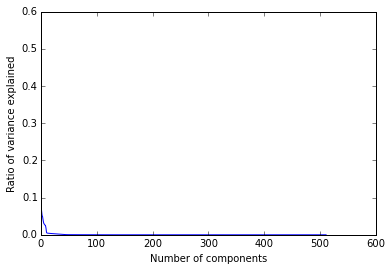

In [63]:
explained_variance = pca.estimate_components()
plt.plot(explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Ratio of variance explained")
plt.title("PCA performance")

In [62]:
print("First 3 components account " + str(int(sum(pca.explained_variance_ratio[0:3])*100)) + "% of data.")
print(pca.explained_variance_ratio)

First 3 components account 68% of data.
[  5.61900977e-01   6.63811354e-02   5.23772436e-02   4.82248533e-02
   3.79995559e-02   3.11488120e-02   2.88131925e-02   2.61693344e-02
   2.55768731e-02   1.82903027e-02   6.13668201e-03   4.65416727e-03
   4.55212572e-03   4.25853326e-03   3.97012171e-03   3.95636905e-03
   3.88464756e-03   3.69659939e-03   3.49656014e-03   3.30918724e-03
   3.10604049e-03   3.04566474e-03   3.01071684e-03   2.88645882e-03
   2.75382609e-03   2.58909653e-03   2.47185628e-03   2.32248593e-03
   2.20525142e-03   2.12501654e-03   2.07830558e-03   1.97762964e-03
   1.94864406e-03   1.83850637e-03   1.61373646e-03   1.41849274e-03
   1.36945297e-03   1.22875826e-03   1.19563272e-03   1.13829773e-03
   1.08392869e-03   1.00612827e-03   8.64228214e-04   7.87300934e-04
   5.74709522e-04   4.74708936e-04   4.45968975e-04   3.91954881e-04
   3.64625022e-04   3.51374464e-04   3.33832500e-04   3.12111994e-04
   3.05689065e-04   3.00757807e-04   2.98231003e-04   2.7767720

Plot the first two components of maximum variation from PCA.

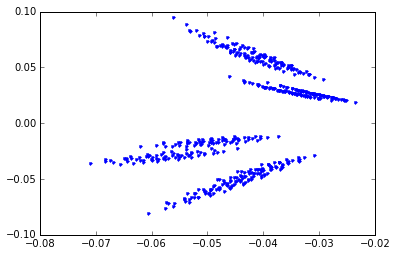

In [57]:
plt.plot(pca.components[0], pca.components[1], '.')

Add the third dimension of maximum variation from PCA

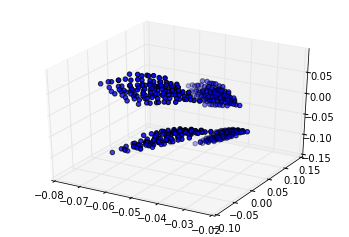

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
xs = pca.components[0]
ys = pca.components[1]
zs = pca.components[2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)

## Spectral Clustering of PCA

We use scikit-learn's spectral clustering here to quickly assign class labels to the phenotypes. This isn't meant to be a rigorous clustering search, just a crude way to separate the obvious clusters.

In [28]:
from sklearn.cluster import SpectralClustering

In [29]:
clusters = SpectralClustering(4)
labels = clusters.fit_predict(pca.components[0:2].T)
print(labels)

Plot the clustered data from the first two components from PCA.

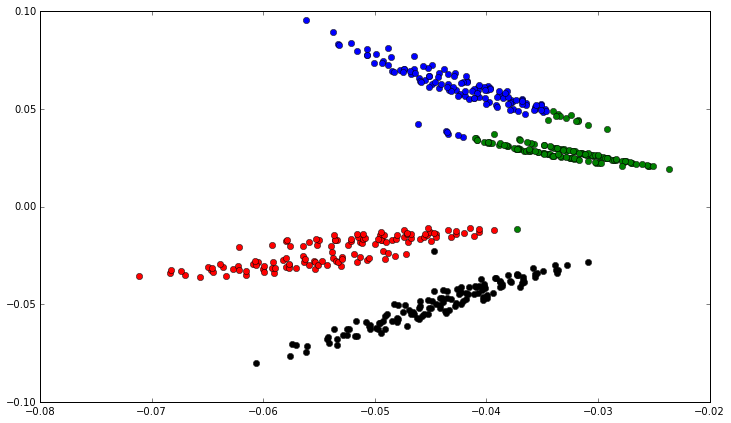

In [49]:
plt.figure(figsize=[12,7])
colors = ['b', 'k', 'g', 'r']
for i in range(len(pca.components[0])):
    plt.plot(pca.components[0,i], pca.components[1,i], 'o'+colors[labels[i]])

In [56]:
# Print one genotypes-phenotypes of one of the colors
for i in range(len(pca.components[0])):
    if colors[labels[i]] == 'r':
        print genotypes[i], phenotypes[i]

AAAAAAAAA 1.0
AAAAAAAAT 8.89224570674
AAAAAAATA -20.5909015239
AAAAAAATT -33.0451104941
AAAAAATAA -13.97539498
AAAAAATAT -8.00128965187
AAAAAATTA -11.4580290934
AAAAATAAA -0.696351023836
AAAAATATA -17.5211021745
AAAAATATT -40.0222587672
AAAAATTAA -12.5824492229
AAAAATTAT 10.3310009357
AAAAATTTA 1.51530079418
AAAATAAAA 23.5712465158
AAAATAATA -1.0618510049
AAAATAATT 10.0494588049
AAAATATAA -1.196189522
AAAATATAT 41.3459181494
AAAATATTT -20.3202450165
AAAATTAAT 48.2752268084
AAAATTATA 22.1824635245
AAAATTATT -16.8491202261
AAAATTTAT 59.6439825486
AAAATTTTT 2.90827706764
AAATAAAAA -20.889377937
AAATAAATA -29.5304561627
AAATAATAA -12.6271084208
AAATAATTA -6.09456882317
AAATATAAT -17.4830340456
AAATATTTA -13.3589083774
AAATATTTT -29.5497249797
AAATTAAAA -21.4275843995
AAATTAAAT 14.2420552155
AAATTAATT -33.7541534781
AAATTATAT -25.4432428262
AAATTATTA -33.4209526821
AAATTATTT -105.16445677
AAATTTAAT -49.2035719189
AAATTTATT -150.781283086
AAATTTTAA -50.8044066096
AAATTTTTA -52.7222350251
AAT